In [0]:

#Importing the necessary libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt 


In [43]:
#Uploading the data
data = pd.read_csv("iris.csv")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [44]:

#Replacing the names with arrays for future convinience
data.species = data.species.map({"setosa":[1,0,0],"virginica":[0,1,0],"versicolor":[0,0,1]})

#Shuffling the data for getting improved result during training
data = data.iloc[np.random.permutation(len(data))]
data  = data.reset_index(drop=True)
data


,sepal_length,sepal_width,petal_length,petal_width,species
0,7.7,2.6,6.9,2.3,"[0, 1, 0]"
1,6.8,3.2,5.9,2.3,"[0, 1, 0]"
2,4.9,3.1,1.5,0.1,"[1, 0, 0]"
3,6.1,3.0,4.9,1.8,"[0, 1, 0]"
4,5.7,3.8,1.7,0.3,"[1, 0, 0]"
...,...,...,...,...,...
145,5.1,3.5,1.4,0.2,"[1, 0, 0]"
146,6.5,2.8,4.6,1.5,"[0, 0, 1]"
147,4.8,3.0,1.4,0.3,"[1, 0, 0]"
148,6.4,2.9,4.3,1.3,"[0, 0, 1]"


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


1.0986121
0.144349
0.08252002
0.06082154


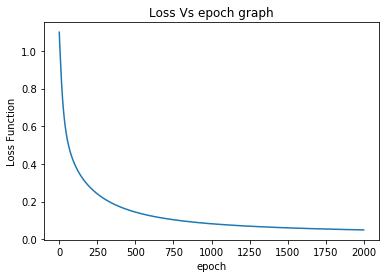

In [45]:
#Separating the dataset in the training and testing domain by 80% and 20%
x_input = data.iloc[0:120,0:4]
y_input = data.iloc[0:120,4]
x_test  = data.iloc[120:,0:4]
y_test  = data.iloc[120:,4]

# y_ represents y predicted inituializing it with others in tensorflow
y_      = tf.placeholder(tf.float32,shape=[None,3])
x       = tf.placeholder(tf.float32,shape=[None,4])
W       = tf.Variable(tf.zeros([4,3]))
b       = tf.Variable(tf.zeros([1,3]))

#Defining the softmax function for multiclass classification
y = tf.nn.softmax(tf.matmul(x,W) + b)

##Defining the loss function
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y),1))

#Training begins..........
optimizer  = tf.train.AdamOptimizer(0.01).minimize(cross_entropy)
sess = tf.InteractiveSession()
varactive = tf.initialize_all_variables()
epoch = 2000
Y,X=[],[]
sess.run(varactive)
for i in range(epoch):
  _,c = sess.run([optimizer,cross_entropy],feed_dict=({x:x_input,y_:[t for t in y_input.as_matrix()]}))
  Y.append(c)
  X.append(i)
  if i%500  == 0:
    print(c)

#Getting a view of loss vs epoch visually     
plt.plot(X,Y)
plt.xlabel("epoch")
plt.ylabel("Loss Function")
plt.title("Loss Vs epoch graph")
plt.show()    

In [46]:
#Checking for a particular case will we get the correct result?
q = data.iloc[130,0:4]
b = q.values.reshape(1,4)
actual = data.iloc[130,4]
result = sess.run(tf.argmax(y,1),feed_dict={x:b})
print(actual,result,end=" ") 

[1, 0, 0] [0] 

In [47]:
#Checking the accuracy
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
print(sess.run([accuracy],feed_dict={x:x_test,y_:[f for f in y_test.as_matrix()]}))
print(accuracy)

[0.96666664]
Tensor("Mean_17:0", shape=(), dtype=float32)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
